In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ir_measures
from ir_measures import *

In [2]:
def evaluate(run: str, qrels_path: str, metrics: list) -> dict:
    if isinstance(run, str):
        run = ir_measures.read_trec_run(run)
    qrels = ir_measures.read_trec_qrels(qrels_path)
    return ir_measures.calc_aggregate(metrics, qrels, run)

# SPECIFY RANKING AND QRELS
qrels = './data/ms-marco/msmarco-docdev-qrels.tsv'
ranking = './rankings/passages-ms-marco-rankingmax.tsv'
ranking_to_docs = './rankings/passages-ms-marco-rankingmax-todocs.tsv' #be careful not to overwrite here

k = 2000
METRICS = [RR@10, RR@100, nDCG@10, R@1000, AP@100]

In [3]:
# LOAD DataFrame
df = pd.read_csv(ranking, sep='\t', usecols=range(6), names=['q_id', 'iter', 'p_id', 'rank', 'score', 'name'])
df[:k]

,q_id,iter,p_id,rank,score,name
0,174249,0,D1987645_0,1,85.225204,passages-ms-marco-rankingmax
1,174249,0,D2126087_5,2,82.144936,passages-ms-marco-rankingmax
2,174249,0,D2168983_5,3,81.714188,passages-ms-marco-rankingmax
3,174249,0,D1296411_18,4,81.072876,passages-ms-marco-rankingmax
4,174249,0,D2735404_11,5,80.983276,passages-ms-marco-rankingmax
...,...,...,...,...,...,...
1995,174249,0,D2061348_13,1996,76.313011,passages-ms-marco-rankingmax
1996,174249,0,D2490916_4,1997,76.311806,passages-ms-marco-rankingmax
1997,174249,0,D2118492_4,1998,76.310394,passages-ms-marco-rankingmax
1998,174249,0,D233770_1,1999,76.309059,passages-ms-marco-rankingmax


In [4]:
# SEPARATE Doc_id , Passage_id
df['doc_id'] = df['p_id'].apply(lambda x: x.split('_')[0])
df['p_id'] = df['p_id'].apply(lambda x: int(x.split('_')[1]))

In [5]:
# REMOVE DUPLICATE DOC_IDS
tmp = []
num_queries = 200
for i in range(num_queries):
    start = i*k
    end = (i+1)*k
    x = df[start:end].drop_duplicates(subset='doc_id', keep="first")
    # print(len(x)) # Use to examine amount of duplicates being removed
    tmp.append(x)
df = pd.concat(tmp)

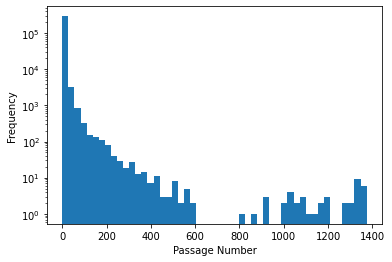

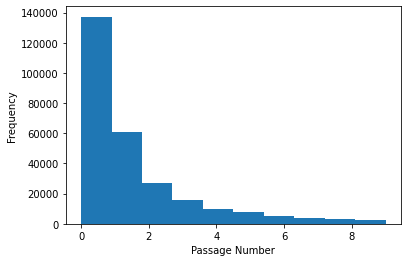

In [6]:
# COMPUTE bins and PLOT
ax = df["p_id"].plot.hist(bins=50,logy=True)
ax.set_xlabel('Passage Number')
plt.show()
ax = df[df['p_id'] < 10]['p_id'].plot.hist(bins=10)
ax.set_xlabel('Passage Number')
plt.show()

In [7]:
# EVALUATE
df['p_id'] = df['doc_id']
df = df.drop(['doc_id'], axis=1) # drop passage_ids
df = df.rename(columns={'p_id':'d_id'})
df.to_csv(ranking_to_docs, sep='\t', index=False, header=None) # write to TREC format file
results = evaluate(ranking_to_docs, qrels, METRICS)
for metric, score in results.items():
    print("{}: {:.2f}".format(metric,score*100)) 

R@1000: 1.35
nDCG@10: 0.73
RR@100: 0.64
RR@10: 0.63
AP@100: 0.64


In [8]:
import numpy as np
x = np.array([3,1])
np.linalg.norm(x)

3.1622776601683795

In [9]:
y = np.array([-1,2])
np.linalg.norm(y)

2.23606797749979

In [10]:
np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

-0.14142135623730948

In [11]:
np.dot(x/np.linalg.norm(x), y/np.linalg.norm(y))

-0.1414213562373095

In [12]:
x/np.linalg.norm(x,2)

array([0.9486833 , 0.31622777])